In [ ]:
# PCA model reduces the dimensions without affecting the accuracy, by finding out the most important components
# In very large datasets, it helps reduce the time and computational energy spent on the analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
my_df = pd.DataFrame(digits.data, columns=digits.feature_names)
my_df['target'] = digits.target
my_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [5]:
# Creating input and target dataframes
inputs = my_df.drop(columns=['target'])
target = my_df['target']
inputs.shape, target.shape

((1797, 64), (1797,))

In [8]:
# Scalling the values
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
inputs = scale.fit_transform(inputs)


In [9]:
#Splitting the datasets into train and test
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, target_train, target_test = train_test_split(inputs, target, test_size=0.2, random_state=88)
print("Training data sets: ", inputs_train.shape, target_train.shape)
print("Testing data sets: ", inputs_test.shape, target_test.shape)

Training data sets:  (1437, 64) (1437,)
Testing data sets:  (360, 64) (360,)


In [10]:
# Building the RandomForrest model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [11]:
# Training the model using training datasets
model.fit(inputs_train, target_train)

RandomForestClassifier()

In [12]:
model.score(inputs_test, target_test)

0.9777777777777777

In [22]:
# Finding predicted values using the trained model and test dataset
target_pred = model.predict(inputs_test)
target_pred.shape, target_test.shape

((360,), (360,))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.97      1.00      0.98        29
           2       1.00      1.00      1.00        43
           3       0.91      0.97      0.94        31
           4       0.97      0.97      0.97        35
           5       0.98      0.86      0.92        51
           6       0.98      0.95      0.97        44
           7       0.97      0.97      0.97        30
           8       0.94      0.94      0.94        36
           9       0.86      0.97      0.91        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



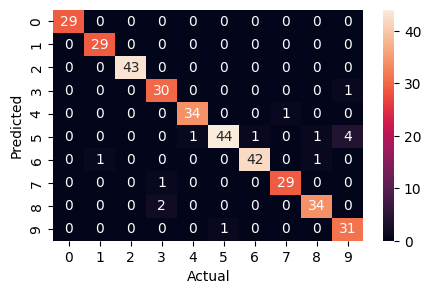

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
# To find where the model made mistakes
import seaborn as sn
plt.figure(figsize=(5,3))
sn.heatmap(confusion_matrix(target_test, target_pred), annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")

print(classification_report(target_test, target_pred))

In [16]:
# Principal Componenent Analysis model
from sklearn.decomposition import PCA
pca = PCA(0.95)  #Retains 95% of variation and identifies the most important components
inputs_pca = pca.fit_transform(inputs)
inputs_pca.shape

(1797, 40)

In [ ]:
pca.explained_variance_ratio_

In [18]:
#Splitting the datasets into train and test--> USING inputs_pca
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, target_train, target_test = train_test_split(inputs_pca, target, test_size=0.2, random_state=88)
print("Training data sets: ", inputs_train.shape, target_train.shape)
print("Testing data sets: ", inputs_test.shape, target_test.shape)

Training data sets:  (1437, 40) (1437,)
Testing data sets:  (360, 40) (360,)


In [19]:
# Building the RandomForrest model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [20]:
# Training the model using training datasets
model.fit(inputs_train, target_train)

RandomForestClassifier()

In [21]:
model.score(inputs_test, target_test)

0.9583333333333334

In [24]:
# Finding predicted values using the trained model and test dataset
target_pred = model.predict(inputs_test)
target_pred.shape, target_test.shape

((360,), (360,))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.97      1.00      0.98        29
           2       1.00      1.00      1.00        43
           3       0.91      0.97      0.94        31
           4       0.97      0.97      0.97        35
           5       0.98      0.86      0.92        51
           6       0.98      0.95      0.97        44
           7       0.97      0.97      0.97        30
           8       0.94      0.94      0.94        36
           9       0.86      0.97      0.91        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



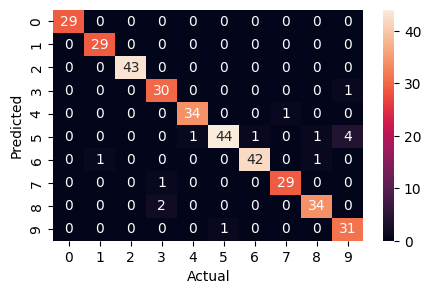

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
# To find where the model made mistakes
import seaborn as sn
plt.figure(figsize=(5,3))
sn.heatmap(confusion_matrix(target_test, target_pred), annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")

print(classification_report(target_test, target_pred))